# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
# Create a Beautiful Soup Object
html = browser.html
soup = BeautifulSoup(html, 'html.parser')
# soup

In [5]:
# Extract all rows of data
table = soup.find('table', class_='table')
rows = table.find_all('tr')
# rows

In [6]:
# Read in HTML tables into a DataFrame - this is SO much easier! (but used BeautifulSoup)
# df = pd.read_html("https://static.bc-edx.com/data/web/mars_facts/temperature.html")
# df

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [7]:
# From starter code: Create an empty list
row_headers = []
table_values = []

In [8]:
# Collecting data - headers
for row in table.find_all('tr'): 
    for head in row.find_all('th'):
        row_headers.append(head.text)
row_headers

['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']

In [9]:
# Collecting data - row values
for row in table.find_all('tr')[1:]: 
    td_tags = row.find_all('td')
    td_val = [y.text for y in td_tags]
    table_values.append(td_val)
# table_values

In [10]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
df = pd.DataFrame(table_values, columns = row_headers)

In [11]:
# Confirm DataFrame was created successfully
df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [12]:
# Examine data type of each column
df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [13]:
# Change data types for data analysis
df = df.astype({'sol': 'int64', 'ls': 'int64', 'month': 'int64', 'min_temp': 'float', 'pressure': 'float'})
df['terrestrial_date'] = pd.to_datetime(df['terrestrial_date'])

In [14]:
# Confirm type changes were successful by examining data types again
df.dtypes
# df.head()

id                          object
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data 
#### See the answers at the end of this this section.

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [15]:
# 1. How many months are there on Mars?
months = df.groupby('month')['sol'].count()
months

month
1     174
2     178
3     192
4     194
5     149
6     147
7     142
8     141
9     134
10    112
11    138
12    166
Name: sol, dtype: int64

In [16]:
# 2. How many Martian days' worth of data are there? 
martian_days = df['sol'].nunique()
martian_days

1867

In [17]:
# 3. What is the average low temperature by month?
ave_low = df.groupby('month')['min_temp'].mean()
ave_low

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

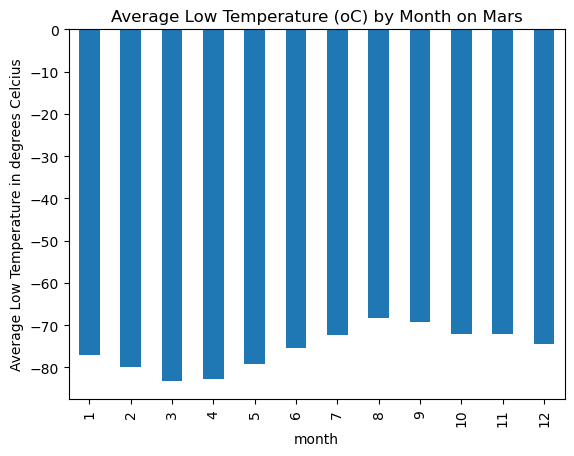

In [18]:
# Plot the average temperature by month
ave_low.plot(kind="bar", width= 0.5, legend=False)
plt.ylabel("Average Low Temperature in degrees Celcius")
plt.title("Average Low Temperature (oC) by Month on Mars")

plt.show()

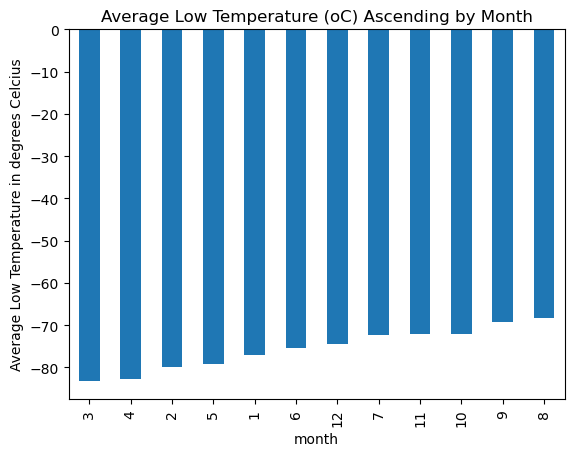

In [19]:
# Identify the coldest and hottest months in Curiosity's location
temp_sort = pd.DataFrame(ave_low)
temp_sort = temp_sort.sort_values(['min_temp'],ascending=True)

temp_sort.plot(kind="bar", width= 0.5, legend=False)
plt.ylabel("Average Low Temperature in degrees Celcius")
plt.title("Average Low Temperature (oC) Ascending by Month")

plt.show()

In [20]:
# 4. Average pressure by Martian month
ave_pres = df.groupby('month')['pressure'].mean()
ave_pres

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

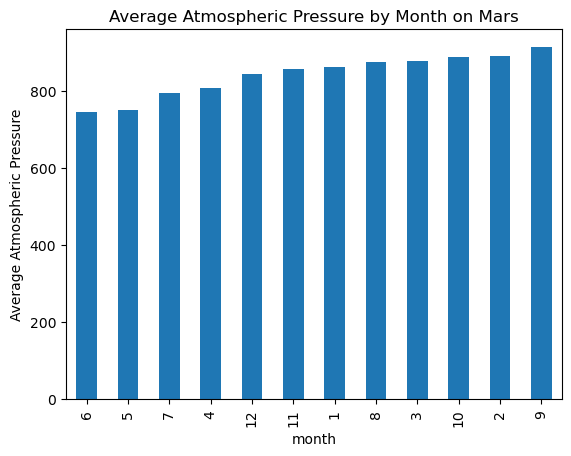

In [21]:
# Plot the average pressure by month
ave_pres = pd.DataFrame(ave_pres)
ave_pres = ave_pres.sort_values(['pressure'],ascending=True)


ave_pres.plot(kind="bar", width= 0.5, legend=False)
plt.ylabel("Average Atmospheric Pressure")
plt.title("Average Atmospheric Pressure by Month on Mars")

plt.show()

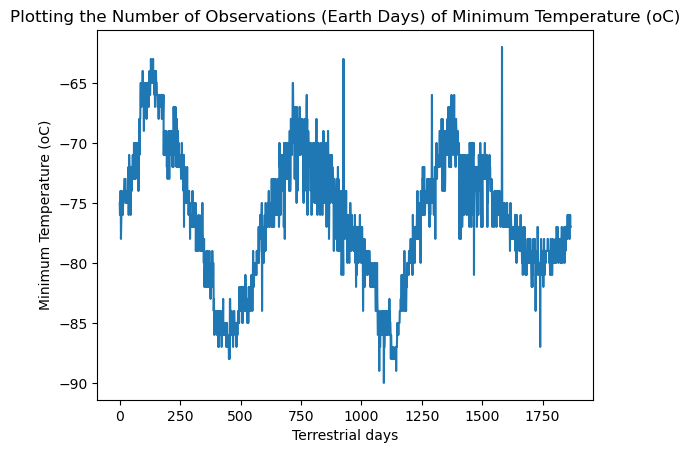

In [22]:
# 5. How many terrestrial (earth) days are there in a Martian year?
plt.plot(df["min_temp"])
plt.title("Plotting the Number of Observations (Earth Days) of Minimum Temperature (oC)")
plt.xlabel("Terrestrial days")
plt.ylabel("Minimum Temperature (oC)")

plt.show()

In [27]:
# Look at the highest temperature to find the peaks by matching the approx day to the highest temp in that day range
# Used.head(100), (75), (50) to get a rough idea
max_desc = df.sort_values(['min_temp'],ascending=False)
max_desc.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
1582,1614,2017-05-10,1692,2,1,-62.0,820.0
926,938,2015-06-20,1020,0,1,-63.0,832.0
138,60,2013-01-09,152,241,9,-63.0,914.0
129,50,2012-12-31,143,235,8,-63.0,908.0
95,12,2012-11-26,109,213,8,-64.0,844.0


On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Data Analysis - Aleid van der Zel

Below are the answers to the question posed at the beginning of the :

1. How many months exist on Mars?
    * Since the column definition describes "month: the Martian month", the data was analyzed using a groupby on the month along with a count of days by that group.  This provides two answers - the number of Martian months, which is 12, and also the number of days that data was recorded on during each month (which vary).  <br>
    <br>
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
    * The instructions describe "sol" as the number of days Curiosity has been on Mars and it increments in the column. Completing a count of the number of data rows (unique days) in the "sol" column.  There were 1867 days recorded.  <br>
    <br>  
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? 
    * The coldest month on Mars (at the location of Curiosity) is Month 3 (average min temp (oC) = -83.307292)
    * The warmest month on Mars (at the location of Curiosity) is Month 8 (average min temp (oC) = -68.382979)  <br>
    <br>  
4. Which months have the lowest and the highest atmospheric pressure on Mars? 
    * The lowest atmospheric pressure on Mars (at the location of Curiosity) is Month 6 (745.054422)
    * The lowest atmospheric pressure on Mars (at the location of Curiosity) is Month 9 (913.305970)  <br>
    <br>  
5. About how many terrestrial (Earth) days exist in a Martian year? 
    * There are three distinct peaks from which and estimate of "seasons" can be made.
    * The first peak to peak is approximately 750 - 150 = 600 days
    * The second peak to peak is approximately 1425 - 750, or 675 days (provided in starter data)
    * This would result in an average of approximately 638 days (visually)  <br?
    <br>
    * By sorting by min temp in descending order a little better estimation can be made (it is an estimate because data was not recorded on every terrestrial day within a martian month).
    * day 1384 = -66
    * day 716 = -65 which is about 648 days to the final peak
    * day 129 = -63 which is about 587 days to the second peak
    * This still gives an estimated average of around 617 days  <br>
    <br>
    * Both of these estimates are less than the internet search of 687 Earth days = a Mars year (https://mars.nasa.gov/all-about-mars/facts/mars-year/#:~:text=This%20is%20the%20vernal%20equinox,year%20is%20687%20Earth%20days).


### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [28]:
# Write the data to a CSV
df.to_csv("marsWeather.csv", index=False, header=True)

In [29]:
browser.quit()